In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("C:\\Users\\p#an!\\Desktop\\Machine_learning\\Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


Text(0.5, 0, 'EstimatedSalary')

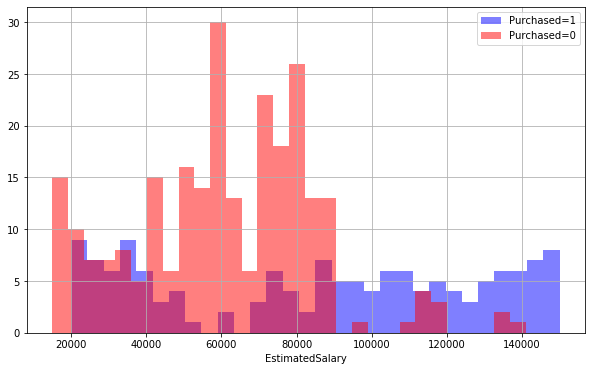

In [12]:
plt.figure(figsize=(10,6))
data[data['Purchased']==1]["EstimatedSalary"].hist(alpha=0.5,color='blue',
                                              bins=30,label='Purchased=1')
data[data['Purchased']==0]["EstimatedSalary"].hist(alpha=0.5,color='red',
                                              bins=30,label='Purchased=0')
plt.legend()
plt.xlabel('EstimatedSalary')

In [15]:
data.isnull().count()

User ID            400
Gender             400
Age                400
EstimatedSalary    400
Purchased          400
dtype: int64

In [17]:
data.shape

(400, 5)

In [38]:
tar = data["Purchased"].value_counts()
tar

0    257
1    143
Name: Purchased, dtype: int64

In [42]:
feature_cols=['EstimatedSalary']
X = data[feature_cols]
y = data['Purchased']

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

In [44]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [47]:
y_pred = classifier.predict(X_test)

In [48]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[86 11]
 [32 31]]
              precision    recall  f1-score   support

           0       0.73      0.89      0.80        97
           1       0.74      0.49      0.59        63

    accuracy                           0.73       160
   macro avg       0.73      0.69      0.70       160
weighted avg       0.73      0.73      0.72       160



In [50]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.73125
Precision: 0.7380952380952381
Recall: 0.49206349206349204
